In [ ]:
!pip install pandas-profiling==3.3.0

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [ ]:
# carregando a base de dados
df = pd.read_csv('/content/Data - data (2).csv.csv')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()
#observamos que existem dados nulos em CustomerID e description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# observamos que existem valores negativos na quantidade e outliers que precisam
#ser tratados
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611121,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [ ]:
#verifiando os nulos
df.isna().sum().to_frame('Qtd de Nulos')

,Qtd de Nulos
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [ ]:
# Removendo os nulos
df.dropna(inplace=True)

In [ ]:
# Verificando Duplicatas
df.duplicated().sum()

5225

In [ ]:
# removendo duplicatas
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


In [ ]:
#alterando os tipos de dados
df['CustomerID'] = df['CustomerID'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y')
df['UnitPrice'] = df['UnitPrice'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392689 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392689 non-null  object        
 1   StockCode    392689 non-null  object        
 2   Description  392689 non-null  object        
 3   Quantity     392689 non-null  int64         
 4   InvoiceDate  392689 non-null  datetime64[ns]
 5   UnitPrice    392689 non-null  float64       
 6   CustomerID   392689 non-null  int64         
 7   Country      392689 non-null  object        
 8   Preço_total  392689 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.0+ MB


In [ ]:
# Preços unitarios e qtd de produtos com valores iguais ou menores que zero
df[(df['UnitPrice'] <= 0) | (df['Quantity'] <= 0)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Preço_total


In [ ]:
# Filtrando o DF apenas com valores acima de 0
df = df[~((df['UnitPrice'] <= 0) | (df['Quantity'] <= 0))]

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UnitPrice'>

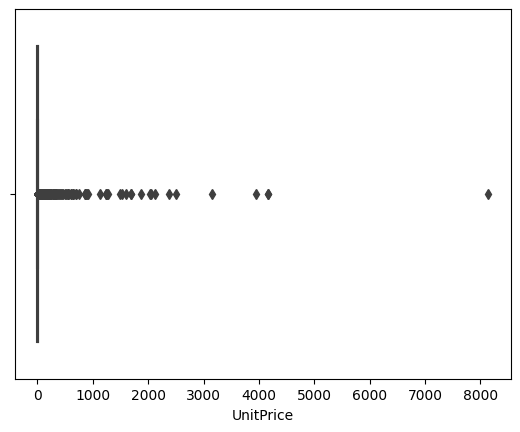

In [ ]:
#Vizualizando outliers de UnitPrice
sns.boxplot(df['UnitPrice'])

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

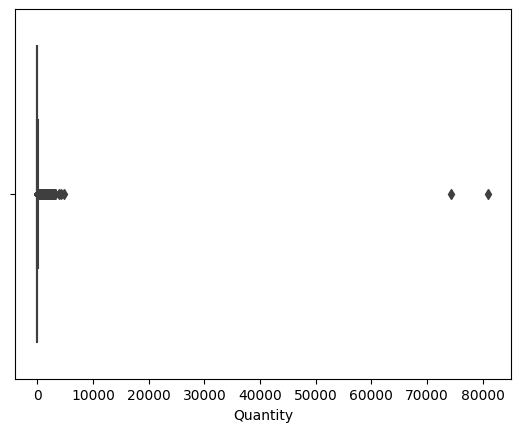

In [ ]:
# Vizualizando outliers de quantity
sns.boxplot(df['Quantity'])

In [ ]:
# Tratamento de Outliers (qtd compra acima de 10.000 e unitprice acima de 5.000)
df[(df['Quantity']>10000) | (df['UnitPrice']> 5000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


In [ ]:
# Excluindo os Outliers do dataframe
df = df[~((df['Quantity']>10000) | (df['UnitPrice']> 5000))]

In [ ]:
# Criando coluna adicional de Preço Total
df['Preço_total'] = df['UnitPrice'] * df['Quantity']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Preço_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
date_max = df['InvoiceDate'].max()
date_max

Timestamp('2011-12-09 12:50:00')

In [ ]:
# TOP 10 paises com maior valor em vendas
top_paises = df.groupby('Country')['Preço_total'].sum().sort_values(ascending=False).head(10)

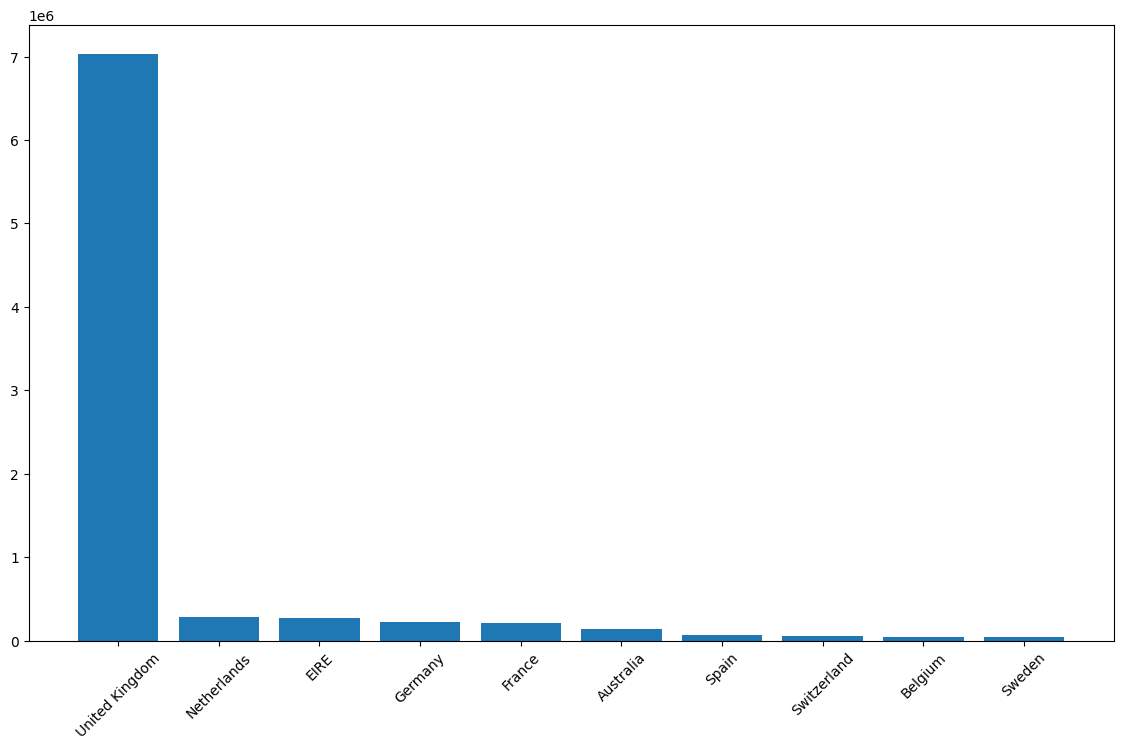

In [ ]:
plt.figure(figsize=(14,8))

plt.bar(top_paises.index, top_paises.values)
plt.xticks(rotation=45)


plt.show()

In [ ]:
# TOP 10 produtos mais vendidos
top_produtos = df.groupby('Description')['Preço_total'].sum().sort_values(ascending=False).head(10)
top_produtos

Description
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
POSTAGE                                69661.21
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
CHILLI LIGHTS                          46265.11
PAPER CHAIN KIT 50'S CHRISTMAS         42584.13
Name: Preço_total, dtype: float64

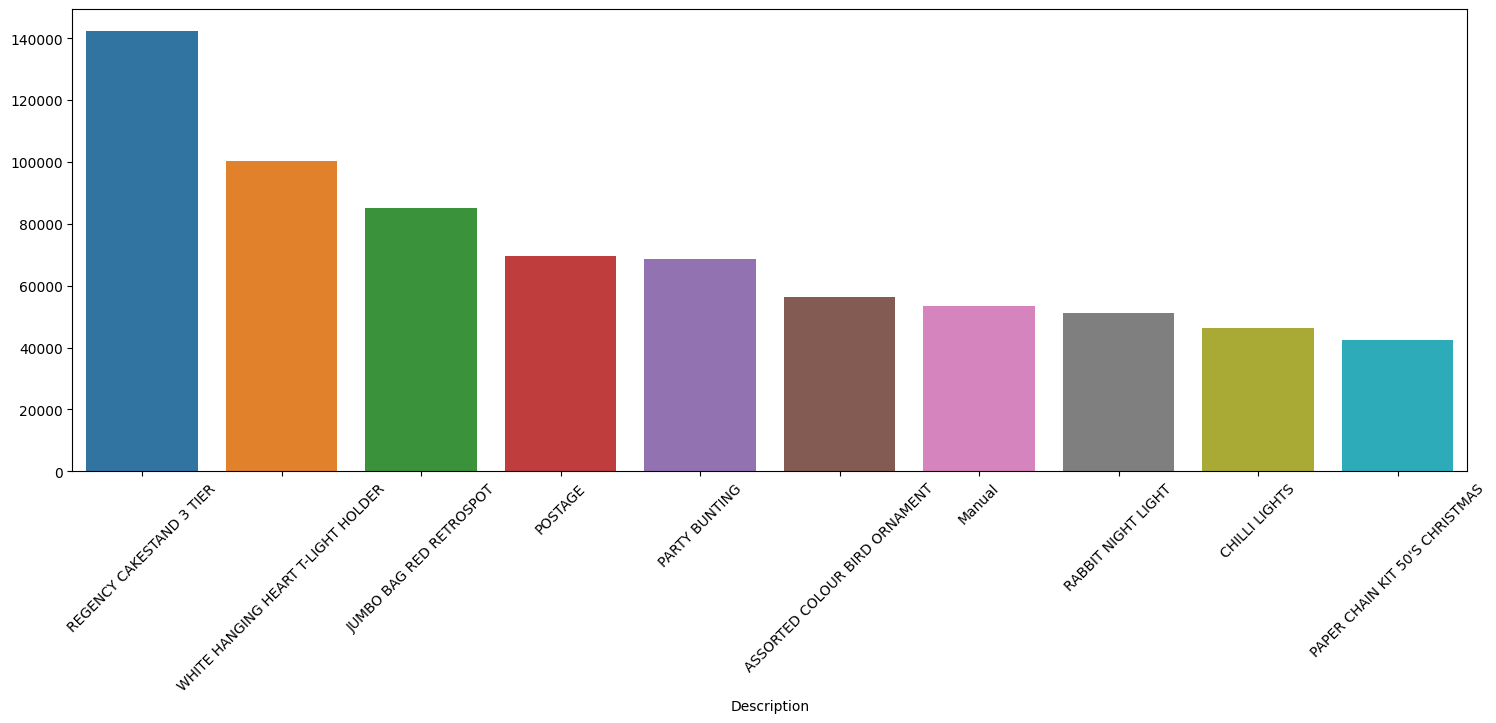

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x=top_produtos.index, y=top_produtos.values)
plt.xticks(rotation=45)
plt.xlabel('Produtos')
plt.ylabel('Valor Total')
plt.title('Top 10 produtos mais vendidos')
plt.show()


In [ ]:
# Valor de venda total por mes
vendas_mes = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Preço_total'].sum().reset_index()
vendas_mes

,InvoiceDate,Preço_total
0,2010-12,570422.73
1,2011-01,490917.71
2,2011-02,446084.92
3,2011-03,594081.76
4,2011-04,468375.33
5,2011-05,669212.40
6,2011-06,660046.05
7,2011-07,598963.90
8,2011-08,644051.04
9,2011-09,950692.20


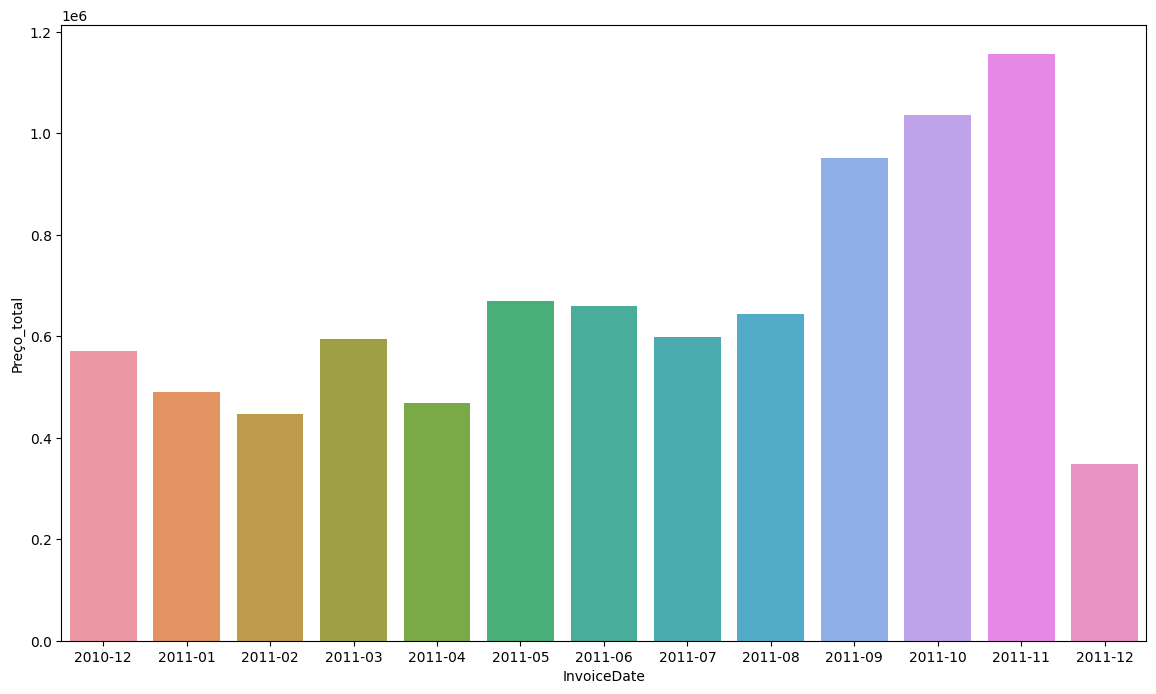

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x=vendas_mes['InvoiceDate'], y=vendas_mes['Preço_total'])
plt.xlabel = 'Mes/Ano'
plt.ylabel = 'Valor Total'
plt.title = 'Valor de venda total por mes'
plt.show()

In [ ]:
# vendas total por mes e por top 10 paises
df_top_paises = df[df['Country'].isin(top_paises.index)]
vendas_mes_paises = df_top_paises.groupby([df['InvoiceDate'].dt.to_period('M'), 'Country'])['Preço_total'].sum().reset_index()
vendas_mes_paises


,InvoiceDate,Country,Preço_total
0,2010-12,Australia,965.35
1,2010-12,Belgium,1809.91
2,2010-12,EIRE,8813.88
3,2010-12,France,9616.31
4,2010-12,Germany,15205.74
...,...,...,...
123,2011-12,Germany,7984.17
124,2011-12,Netherlands,11728.02
125,2011-12,Spain,316.21
126,2011-12,Sweden,238.00


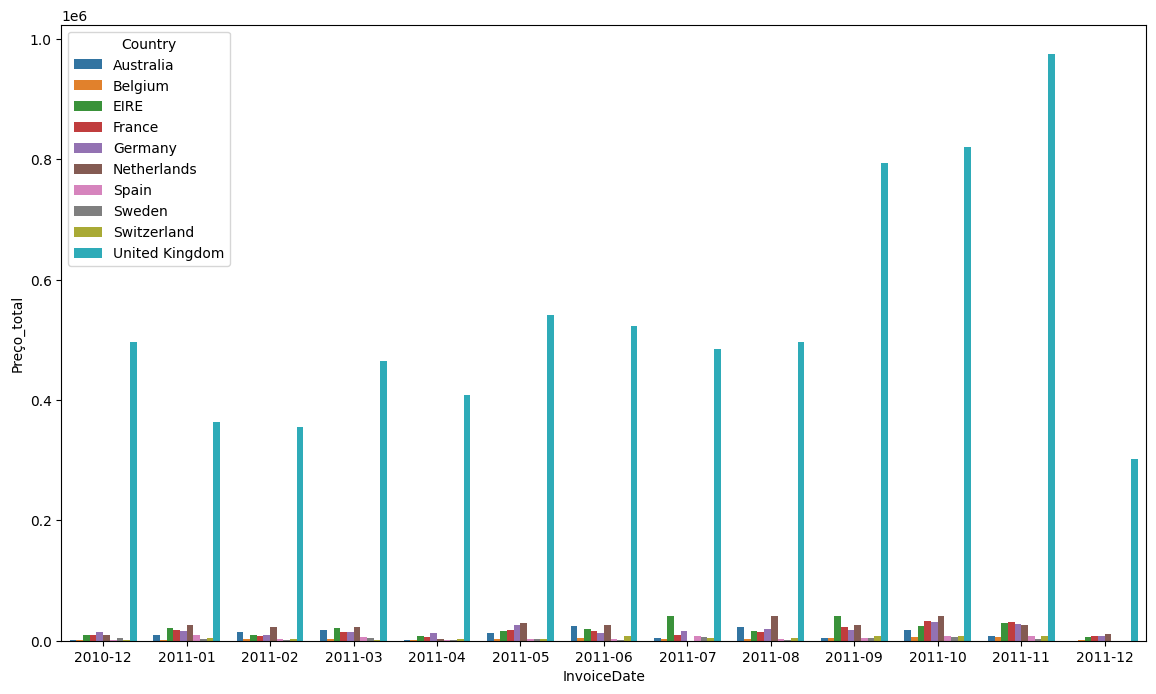

In [ ]:
plt.figure(figsize=(14,8))

sns.barplot(x=vendas_mes_paises['InvoiceDate'], y=vendas_mes_paises['Preço_total'], hue=vendas_mes_paises['Country'])

plt.show()

In [ ]:
# Calculo do RFM
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Preço_total,Date,Mes_ano
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,12-2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,12-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,12-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,12-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,12-2010
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-09,12-2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-09,12-2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-09,12-2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-09,12-2011


In [ ]:
df.drop(columns=['Date','Mes_ano'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Preço_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [ ]:
df.groupby(['CustomerID', 'InvoiceNo'])['Preço_total'].sum().reset_index()

,CustomerID,InvoiceNo,Preço_total
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91
...,...,...,...
18524,18283,579673,220.31
18525,18283,580872,208.00
18526,18287,554065,765.28
18527,18287,570715,1001.32


In [ ]:
date_max

final_output = df.groupby('CustomerID').agg(
    Regency=('InvoiceDate', lambda x: (date_max - x.max()).days),
    Frequency=('InvoiceNo', 'count'),
    Avg_ticket=('Preço_total', 'mean')).reset_index()


In [ ]:
final_output

,CustomerID,Regency,Frequency,Avg_ticket
0,12347,1,182,23.681319
1,12348,74,31,57.975484
2,12349,18,73,24.076027
3,12350,309,17,19.670588
4,12352,35,85,29.482824
...,...,...,...,...
4332,18280,277,10,18.060000
4333,18281,180,7,11.545714
4334,18282,7,12,14.837500
4335,18283,3,721,2.837074
